In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import random

# Name: Aayan Ahmed Khan
# Student ID: 31486347

# Part 1A

## a)

Explanation: 
For equation g(x,y), since it represents the change in population of rabbits over time, I arrived at the answer by adding in a term for the birth rate of rabbits in isolation. Then I added in the term for the death rates of rabbits in isolation. Finally, I added in the term for the change in population of rabbits due to being eaten by foxes and then I added in the term for the change in population of rabbits due to being hunted.

For equation g(x,y), since it represents the change in population of foxes over time, I arrived at the answer by adding in a term for the birth rate of foxes in isolation. Then I added in the term for the death rates of foxes in isolation. Finally, I added in the term for the change in population of foxes that survived by being eating rabbits and then I added in the term for the change in population of foxes due to being hunted.

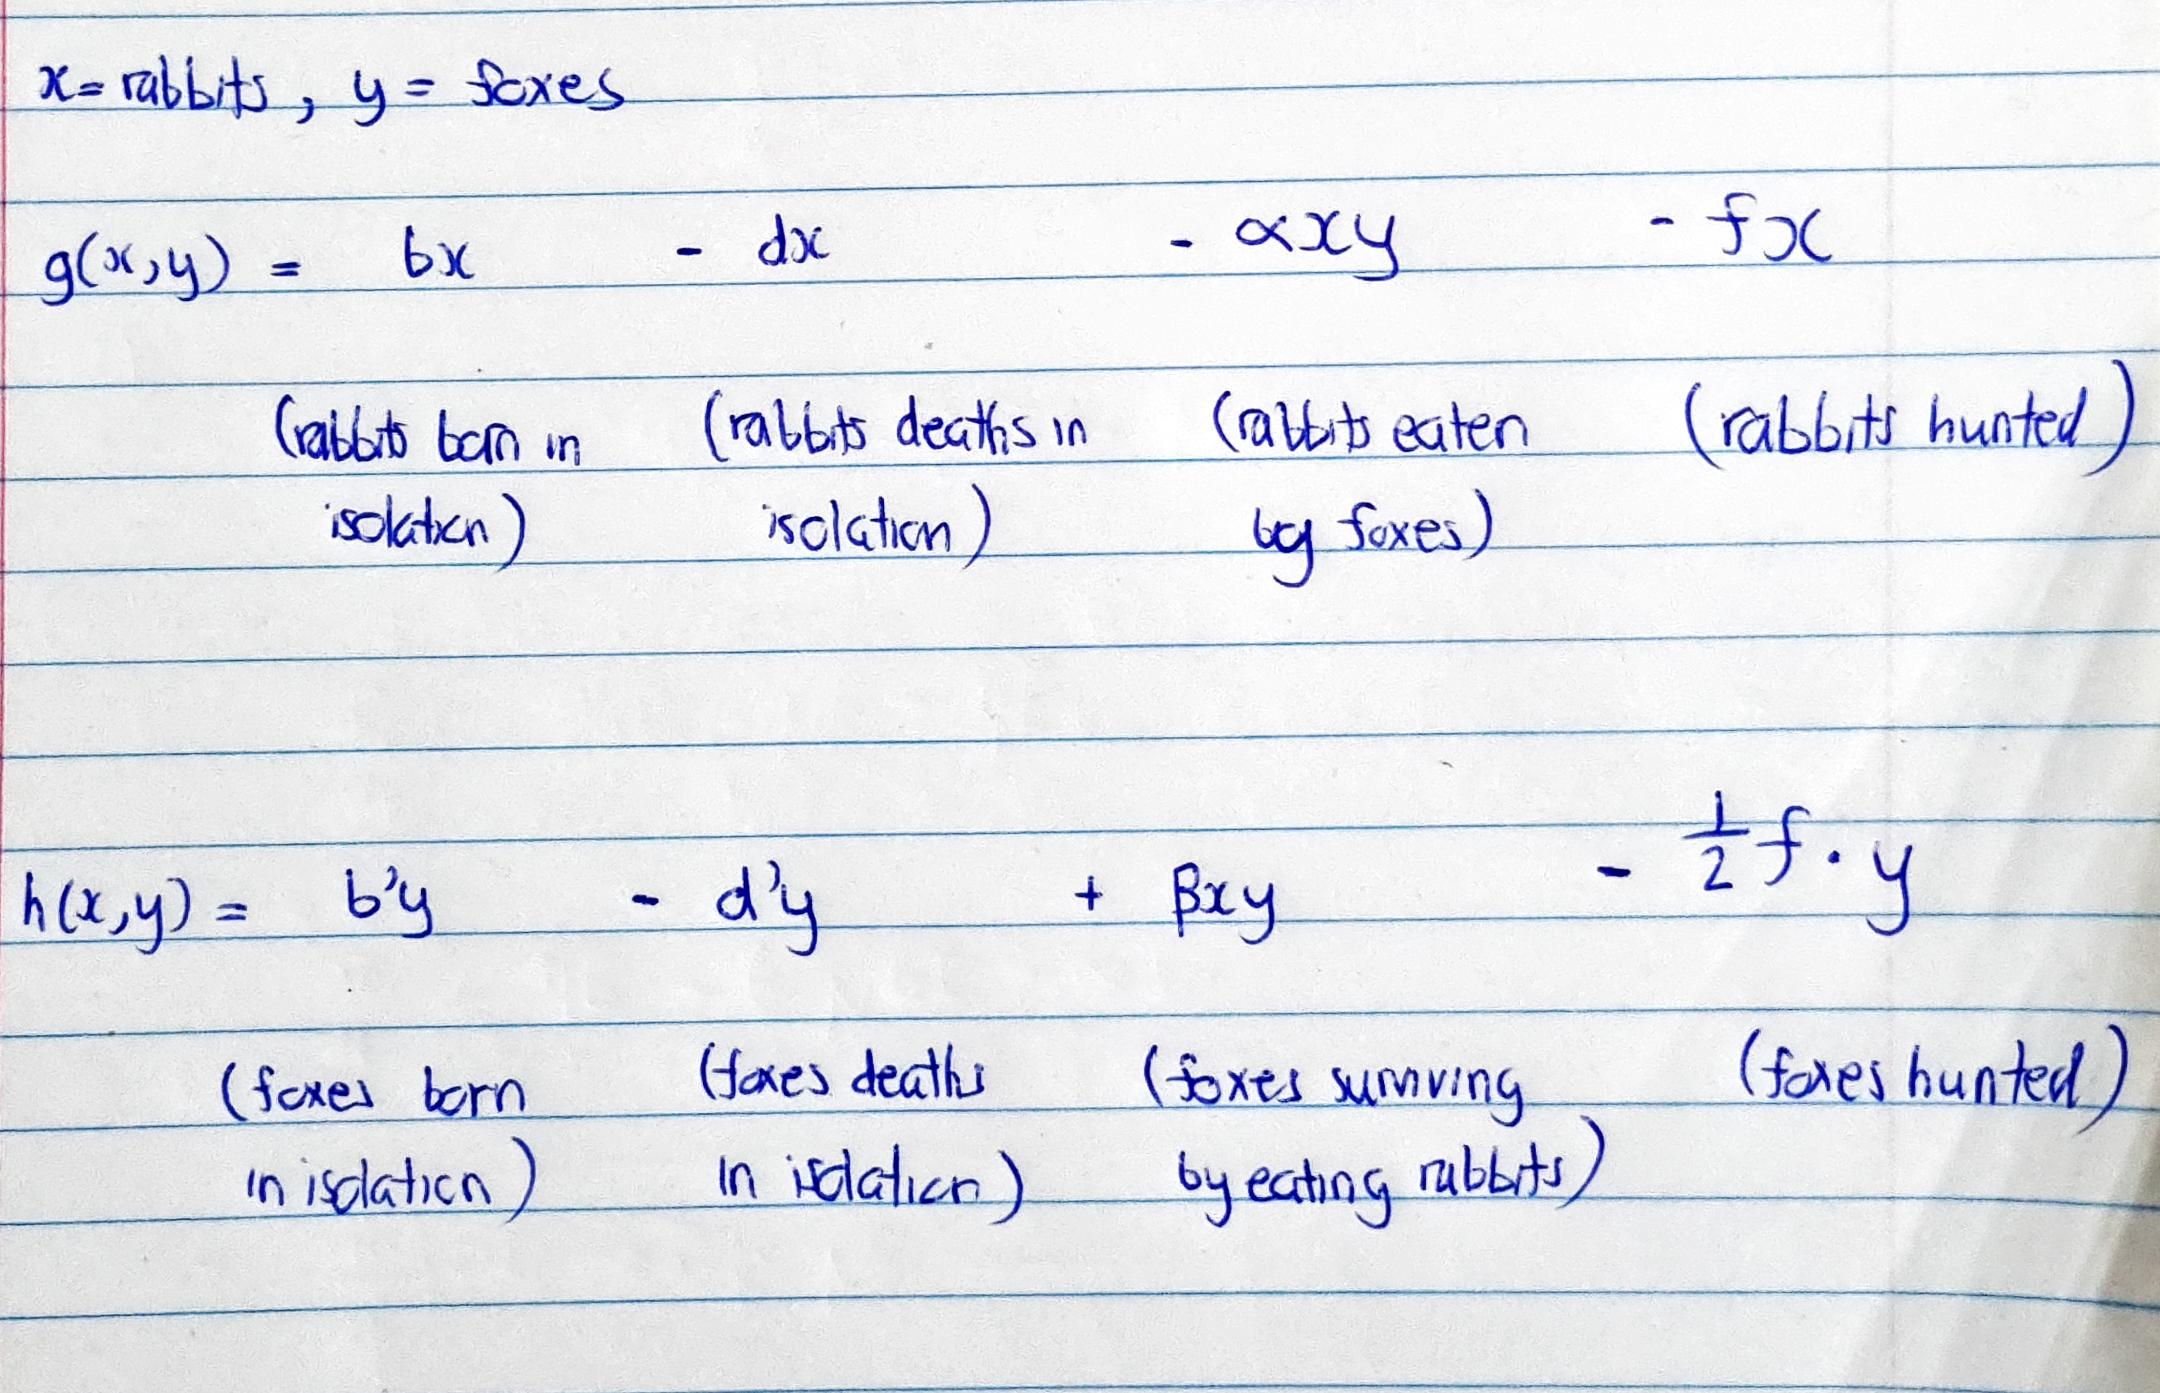

## b)

RK2 Method (Heun's Method implementation referenced from my Lab Week 7), modified to take input x = initial number of rabbits, y0 = initial number of foxes, dxdt = g(x,y), dydt = h(x,y)

In [2]:
def heun(x0, y0, dxdt, dydt, h=0.01, max_iteration = 10000):
    
    x_i = x0
    y_i = y0
    time_i = 0

    #arrays to store results
    time = []
    x = []
    y = []
    
    #loop until we reach max_iteration
    i = 0
    while i < max_iteration:
        
        #append results to array
        x.append(x_i)
        y.append(y_i)
        time.append(time_i)
        
        #create temp variables to store next iteration of variables so that the previous values can be used when
        #when working out the next slope
        
        #calculate rate of population change for first slope
        temp_x = dxdt(x_i, y_i)
        temp_y = dydt(x_i, y_i)
        
        #calculate temp2 for second slope
        temp_x2 = dxdt(x_i + h*dxdt(x_i, y_i), y_i+h)
        temp_y2 = dydt(x_i+h, y_i + h*dydt(x_i, y_i))
        

        #average slopes and add result to our current population
        x_i = x_i + (h * (1/2) * (temp_x2 + temp_x))
        y_i = y_i + (h * (1/2) * (temp_y2 + temp_y))
        
        #increase time by h
        time_i += h

        i += 1
    
    return time, x, y

Functions g(x,y) and h(x,y)

In [3]:
#constants and proportions declared
b = 0.8
d = 0.1
b_dash = 0.1
d_dash = 0.6
alpha = 0.04
beta = 0.01
f = 0.05

def g(x,y):
    result = b*x - d*x - alpha*x*y - (f*x)
    return result

def h(x,y):
    result = b_dash*y - d_dash*y + beta*x*y - (0.5 * f * y)
    return result

## Time evolution and Phase Plots

### Note: An initial population of 25 rabbits and 15 foxes is used instead of the assignment specs as it was mentioned on Ed Forum

### hunting rate f = 0.00

__Interpretation of dynamics__: In the time-evolution plot, we can see that the population of rabbits alternates between 20 and 100 while the population of foxes alternates between 5 and 30. Furthermore, in the phase plot we can clearly see that population of rabbits and foxes alternates around some stationary point. It is important to note that these population changes are occurring without interference from any hunting

In [4]:
f = 0.00

In [5]:
time, x, y = heun(x0 = 25, y0 = 15, dxdt = g, dydt=h, h=0.01, max_iteration = 10000)

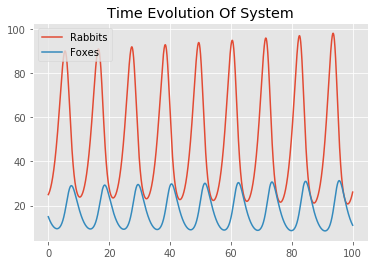

In [6]:
plt.plot(time, x, label = "Rabbits")
plt.plot(time, y, label = "Foxes")
plt.title("Time Evolution Of System")
plt.legend()

(0, 40)

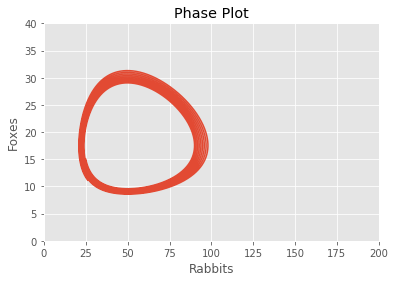

In [7]:
plt.plot(x, y)
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Phase Plot")
plt.xlim(0, 200)
plt.ylim(0, 40)

### hunting rate f = 0.10

__Interpretation of dynamics__: In the time-evolution plot, we can see that the population of rabbits alternates between 20 and 120 while the population of foxes alternates between 5 and 30. Furthermore, in the phase plot we can clearly see that population of rabbits and foxes alternates around some stationary point and that the increase in hunting has resulted in higher populations of rabbits which results in the phase plot being stretched in the x-axis. Also, the hunting seems to have resulted in lower populations of foxes which results in the phase plot being stretched towards the bottom in the y-axis. The addition of hunting seems to have increased the peaks in the population sizes of rabbits while it doesn't seem to have much affect on the population sizes of foxes

In [8]:
f = 0.10

In [9]:
time, x, y = heun(x0 = 25, y0 = 15, dxdt = g, dydt=h, h=0.01, max_iteration = 10000)

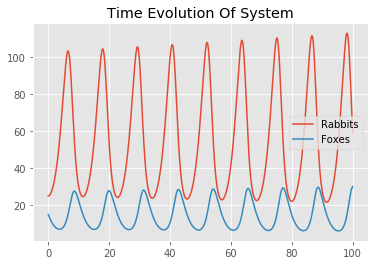

In [10]:
plt.plot(time, x, label = "Rabbits")
plt.plot(time, y, label = "Foxes")
plt.title("Time Evolution Of System")
plt.legend()

(0, 40)

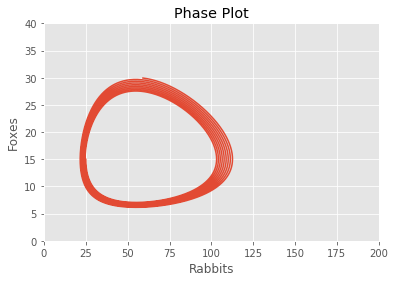

In [11]:
plt.plot(x, y)
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Phase Plot")
plt.xlim(0, 200)
plt.ylim(0, 40)

### hunting rate f = 0.30

__Interpretation of dynamics__: In the time-evolution plot, we can see that the population of rabbits alternates between 20 and 150 while the population of foxes alternates between 3 and 27. Furthermore, in the phase plot we can clearly see that population of rabbits and foxes alternates around some stationary point and that the increase in hunting has resulted in higher populations of rabbits which results in the phase plot being stretched in the x-axis. Also, the hunting seems to have resulted in lower populations of foxes which results in the phase plot being stretched towards the bottom in the y-axis. The higher hunting seems to have increased the peaks in the population sizes of rabbits while it seems to have decreased the troughs in the population sizes of foxes in the time evolution of system

In [12]:
f = 0.30

In [13]:
time, x, y = heun(x0 = 25, y0 = 15, dxdt = g, dydt=h, h=0.01, max_iteration = 10000)

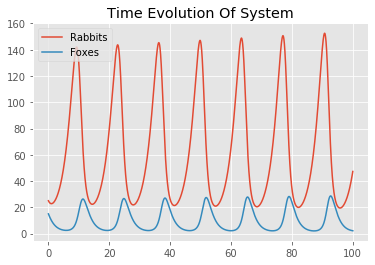

In [14]:
plt.plot(time, x, label = "Rabbits")
plt.plot(time, y, label = "Foxes")
plt.title("Time Evolution Of System")
plt.legend()

(0, 40)

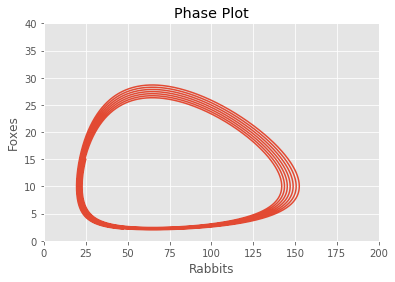

In [15]:
plt.plot(x, y)
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Phase Plot")
plt.xlim(0, 200)
plt.ylim(0, 40)

### hunting rate f = 0.50

__Interpretation of dynamics__: In the time-evolution plot, we can see that the population of rabbits alternates between 20 and 200 while the population of foxes alternates between 1 and 27. Furthermore, in the phase plot we can clearly see that population of rabbits and foxes alternates around some stationary point and that the increase in hunting has resulted in higher populations of rabbits which results in the phase plot being stretched in the x-axis. Also, the hunting seems to have resulted in lower populations of foxes which results in the phase plot being stretched towards the bottom in the y-axis. The higher hunting seems to have increased the peaks in the population sizes of rabbits while it seems to have decreased the troughs in the population sizes of foxes in the time evolution of system

In [16]:
f = 0.50

In [17]:
time, x, y = heun(x0 = 25, y0 = 15, dxdt = g, dydt=h, h=0.01, max_iteration = 10000)

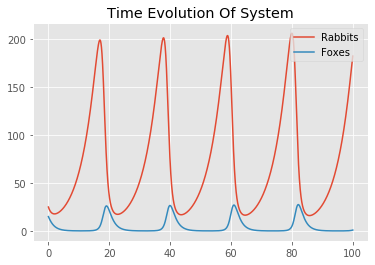

In [18]:
plt.plot(time, x, label = "Rabbits")
plt.plot(time, y, label = "Foxes")
plt.title("Time Evolution Of System")
plt.legend()

(0, 40)

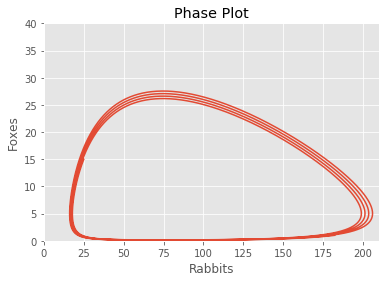

In [19]:
plt.plot(x, y)
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Phase Plot")
plt.xlim(0, 210)
plt.ylim(0, 40)

### hunting rate f = 0.75

__Interpretation of dynamics__: In the time-evolution plot, we can see that the population of rabbits slowly approaches zero over time while the population of foxes approaches zero much more quickly. Furthermore, in the phase plot we can clearly see that population of rabbits and foxes both quickly decline to zero. The extremely high rates hunting seems to have resulted in the extinction of both rabbits and foxes

In [20]:
f = 0.75

In [21]:
time, x, y = heun(x0 = 25, y0 = 15, dxdt = g, dydt=h, h=0.01, max_iteration = 10000)

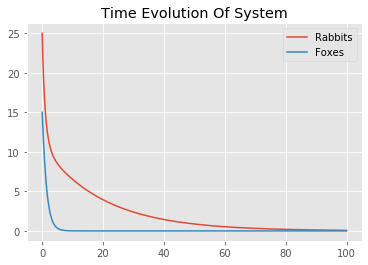

In [22]:
plt.plot(time, x, label = "Rabbits")
plt.plot(time, y, label = "Foxes")
plt.title("Time Evolution Of System")
plt.legend()

(0, 40)

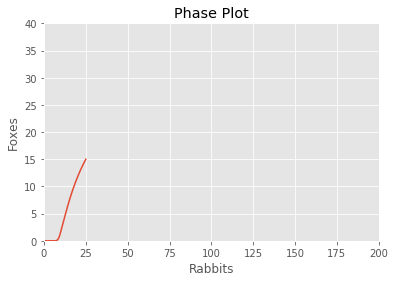

In [23]:
plt.plot(x, y)
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Phase Plot")
plt.xlim(0, 200)
plt.ylim(0, 40)